In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
NUM_MONTHS_PREV = 6
NUM_DAILY_DATA = 20
NUM_DAYS_PREV = 30*NUM_MONTHS_PREV
TOTAL_NUM_POINTS = NUM_DAYS_PREV*NUM_DAILY_DATA
STD_DEV_FACTOR = 0.4
STD_UNIF = np.random.default_rng().uniform(size=TOTAL_NUM_POINTS)
TOTAL_NUM_POINTS

3600

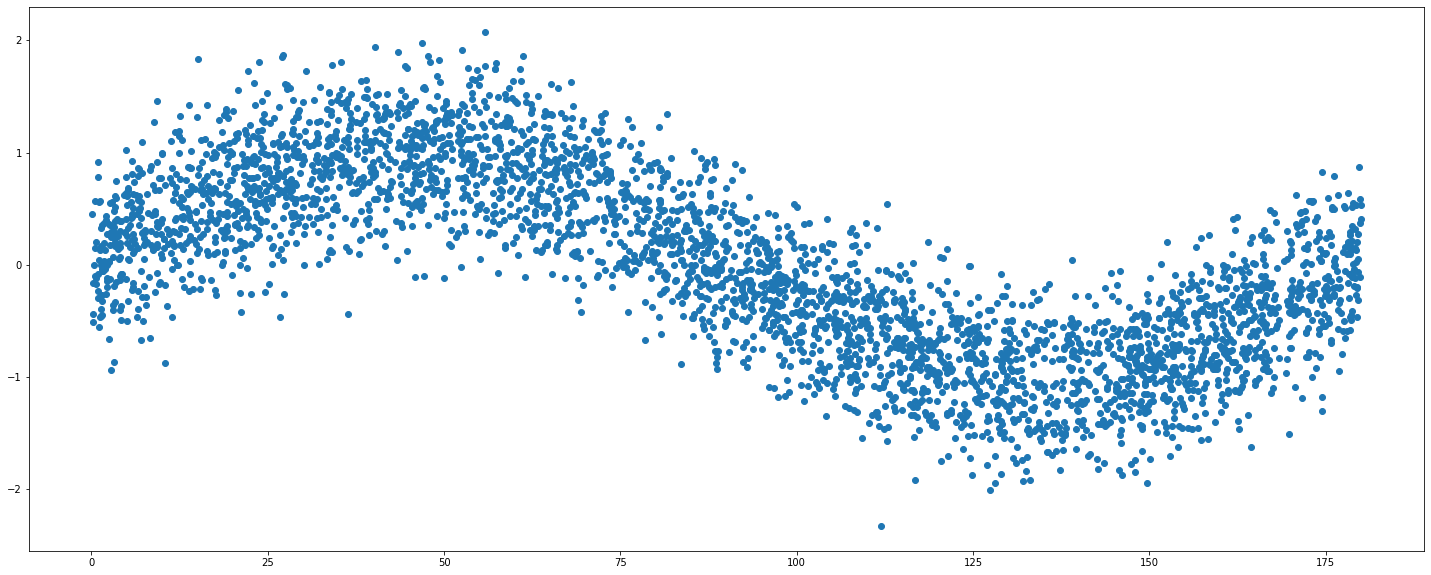

In [3]:
sample_domain = STD_UNIF*NUM_DAYS_PREV
sample_data = np.sin(sample_domain*2*np.pi/NUM_DAYS_PREV) + np.random.default_rng().normal(0, STD_DEV_FACTOR, TOTAL_NUM_POINTS)

plt.figure(figsize=(25,10))
plt.scatter(sample_domain, sample_data)
plt.show()

In [4]:
delta_days_from_now = sample_domain - NUM_DAYS_PREV
today = datetime.datetime.today()

datetimes = np.array(list(map(lambda x: round((datetime.timedelta(days=x)+today).timestamp()*1000), delta_days_from_now)))

In [7]:
s = pd.Series(sample_data, index=datetimes, name="sin_val")
s.head()

1651945492750   -1.311579
1645683489420   -0.422445
1647647850460   -0.133329
1640227453656    0.433951
1644917144259    1.178278
Name: sin_val, dtype: float64

In [10]:
s.sort_index().to_csv("random_sine.csv", index_label="time")